In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def option_payoff(S, K, option_type="call", position="long", premium=0):
    payoff = np.maximum(S - K, 0) if option_type == "call" else np.maximum(K - S, 0)
    if position == "short":
        payoff *= -1
    return payoff - premium

In [3]:
def bull_call_spread(S, K1, K2, C1, C2):
    return option_payoff(S, K1, "call", "long", C1) + option_payoff(S, K2, "call", "short", C2)

def bear_put_spread(S, K1, K2, P1, P2):
    return option_payoff(S, K2, "put", "long", P2) + option_payoff(S, K1, "put", "short", P1)

def long_straddle(S, K, C, P):
    return option_payoff(S, K, "call", "long", C) + option_payoff(S, K, "put", "long", P)

def long_strangle(S, K1, K2, P1, C2):
    return option_payoff(S, K1, "put", "long", P1) + option_payoff(S, K2, "call", "long", C2)

def butterfly_spread(S, K1, K2, K3, C1, C2, C3):
    return (option_payoff(S, K1, "call", "long", C1)
          + 2 * option_payoff(S, K2, "call", "short", C2)
          + option_payoff(S, K3, "call", "long", C3))

def iron_condor(S, Kp1, Kp2, Kc1, Kc2, P1, P2, C1, C2):
    return (option_payoff(S, Kp2, "put", "long", P2)
          + option_payoff(S, Kp1, "put", "short", P1)
          + option_payoff(S, Kc1, "call", "short", C1)
          + option_payoff(S, Kc2, "call", "long", C2))

In [9]:
def plot_strategy(S, payoff, title):
    plt.figure(figsize=(10, 5))
    plt.plot(S, payoff, label="Net Payoff", lw=2)
    plt.axhline(0, color='k', linestyle='--', lw=1)
    plt.title(title)
    plt.xlabel("Underlying Price ($S_T$)")
    plt.ylabel("Profit / Loss")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{title.replace(' ', '_').lower()}.png")
    plt.show()

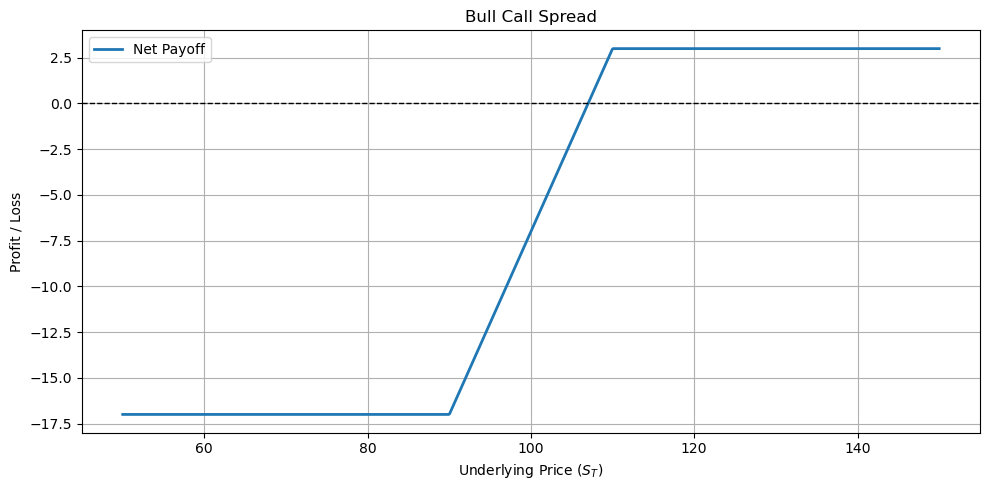

In [14]:
S = np.linspace(50, 150, 1000)
payoff = bull_call_spread(S, K1=90, K2=110, C1=12, C2=5)
plot_strategy(S, payoff, "Bull Call Spread")

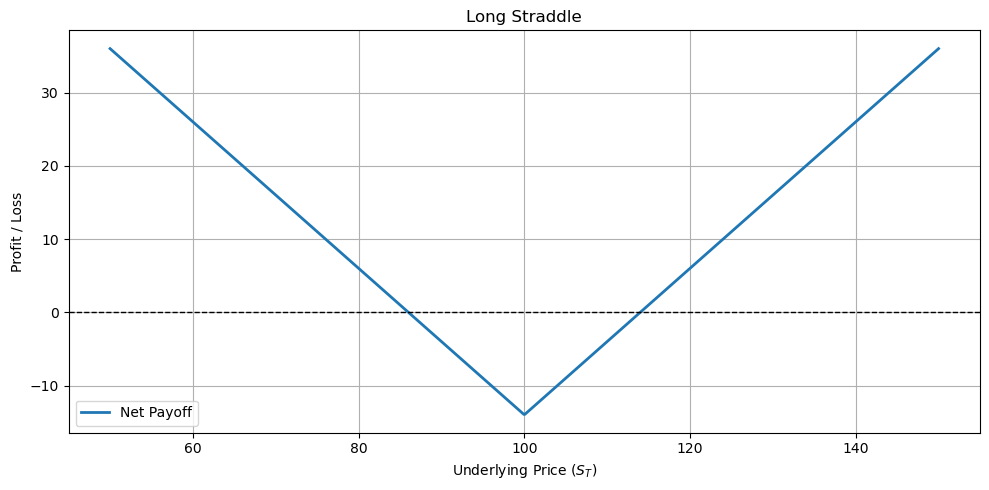

In [15]:
payoff = long_straddle(S, K=100, C=7, P=7)
plot_strategy(S, payoff, "Long Straddle")

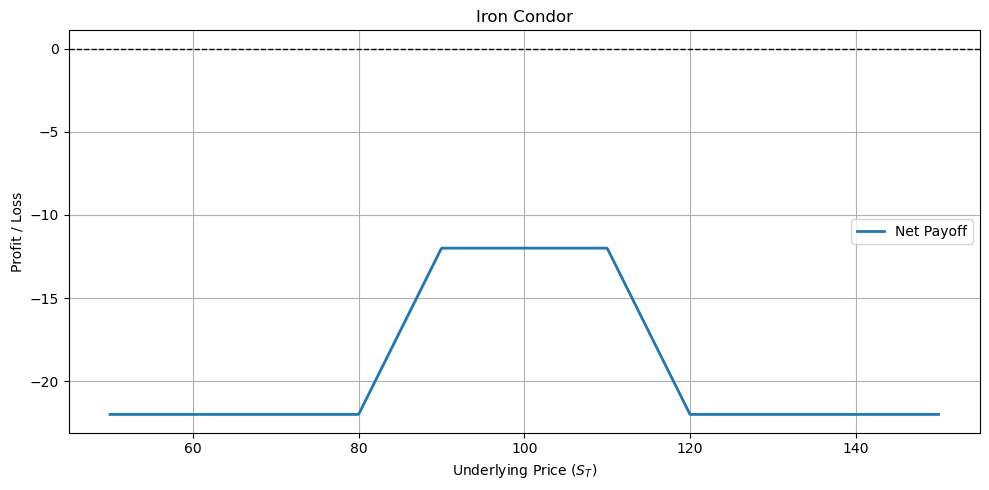

In [16]:
payoff = iron_condor(S, Kp1=90, Kp2=80, Kc1=110, Kc2=120, P1=4, P2=2, C1=4, C2=2)
plot_strategy(S, payoff, "Iron Condor")

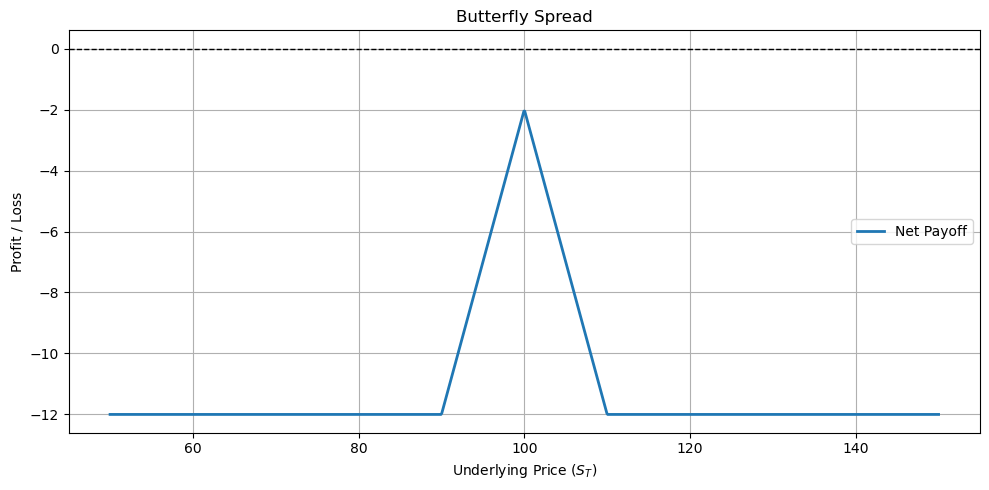

In [17]:
payoff = butterfly_spread(S, K1=90, K2=100, K3=110, C1=4, C2=3, C3=2)
plot_strategy(S, payoff, "Butterfly Spread")